
Daniel Oltean and Jin Xu, Digital continents: Geographical and socio-economic features of Asia and Europe




This project aims to underline some geographical and socio-economic features of Asia and Europe. Obviously, they  are two continents with very different pasts, cultures, resources, and economic potential, but also with many common points.

Their traits are discussed on the basis of the dataset Mondial (University of Göttingen) http://www.dbis.informatik.uni-goettingen.de/Mondial/. The information included in this dataset is explored in a non-critical manner, the main purpose being to use some SQL functions in this specific case.

We use SQL in a Python environment and take profit from Pandas, Seaborn, and Pyplot libraries.

We answer the following ten questions:

Q1: Number of countries/provinces/cities in each continent
Q2: Relationship area/population for Asian and European countries
Q3: Highest mountains in Asia and Europe
Q4: Number of islands belonging to Asian and European countries
Q5: Rivers with the most affluents in Asia and Europe
Q6: Rivers passing through the most countries in Asia and Europe
Q7: GDP per capita of Asia and Europe
Q8: Relationship between industry and agriculture in Asian and European countries
Q9: Relationship between infant mortality and the GDP per capita of Asian and European countries
Q10: Religions appearing in only one European or Asian country


In [12]:
# Modules & Connection 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector
host = "localhost"
username = "root"
password = ""
conn = mysql.connector.connect(host=host, user=username, passwd=password)
cursor = conn.cursor(buffered=True)

cursor.execute("USE mondial")


Q1: Number of countries/provinces/cities in each continent (COUNT, SUM, CAST, ROUND, DISTINCT, UNION, nested query)

Continent  Countries  Provinces  Cities
     Asia         53        403    1055
   Europe         53        491     838


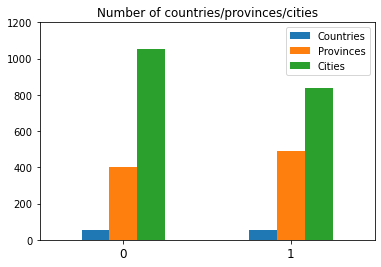

Continent Country  Provinces  Cities
   Europe       A          9       9
     Asia     AFG          1       1
   Europe      AL          1       6
   Europe     AND          1       1
     Asia     ARM          1       1
     Asia      AZ          1       1
   Europe       B          9      10
     Asia      BD          1      25
   Europe      BG          1       1
     Asia     BHT          1       1
   Europe     BIH          1       1
     Asia     BRN          1       1
     Asia     BRU          1       1
   Europe      BY          1       1
   Europe      CH         26      28
     Asia      CL          1       1
   Europe      CY          1       1
   Europe      CZ          7      11
   Europe       D         16      84
   Europe      DK          1       6
   Europe       E         17      58
     Asia      ET          3       3
   Europe      EW          1       1
   Europe       F         22      39
   Europe    FARX          1       1
   Europe      FL          1       1
 

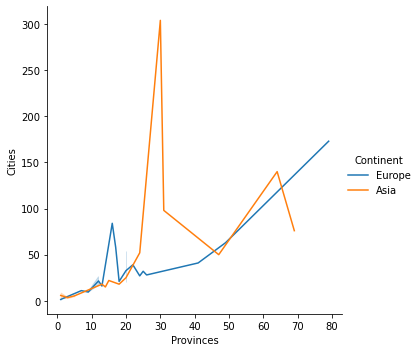

In [13]:
# The answer to this question is not evident because there are some transcontinental countries (like Russia and Turkey).
# For them, we do not know precisely in which continent the provinces/cities are situated.
# For this reason, we apply the percentage of the surface (from the table "encompasses") to thd provinces/cities of all the countries.
# For both Asia and Europe we create tables containing the list of countries and the number of provinces/cities.
# We join the two tables in "total", count the countries and sum up the provinces/cities.
# Using "DISTINCT" is necessary not to count the same province/city many times.

sql1 = """SELECT total.Continent, 
                    COUNT(total.Country) AS Countries, 
                    CAST(SUM(total.Provinces) AS INT) AS Provinces, 
                    CAST(SUM(total.Cities) AS INT) AS Cities
            FROM
                (
                SELECT enc.Continent, city.Country, 
                    CAST(ROUND(COUNT(DISTINCT city.Province)*enc.Percentage/100, 0) AS INT) AS Provinces, 
                    CAST(ROUND(COUNT(DISTINCT city.Name)*enc.Percentage/100, 0) AS INT) AS Cities
                FROM city
                JOIN encompasses enc
                ON city.Country = enc.Country
                WHERE enc.Continent = 'Asia'
                GROUP BY city.Country
            
                UNION
                SELECT enc.Continent, city.Country, 
                    CAST(ROUND(COUNT(DISTINCT city.Province)*enc.Percentage/100, 0) AS INT) AS Provinces, 
                    CAST(ROUND(COUNT(DISTINCT city.Name)*enc.Percentage/100, 0) AS INT) AS Cities
                FROM city
                JOIN encompasses enc
                ON city.Country = enc.Country
                WHERE enc.Continent = 'Europe'
                GROUP BY city.Country
                ) total
            GROUP BY total.Continent
            """

# The results are printed and vizualized.
df1 = pd.read_sql(sql1, conn)
print(df1.to_string(index=False))

ax1 = df1.plot(
    y = ['Countries', 'Provinces', 'Cities'], 
    kind='bar', 
    title='Number of countries/provinces/cities' 
    )
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=12)
ax1.set_ylim([0, 1200])
plt.show()

# We would also like to see the relationship between the number of provinces and cities in each country.
# In this case, we ignore the transcontinental countries.

sql2 = """SELECT enc.Continent, city.Country, 
                    CAST(ROUND(COUNT(DISTINCT city.Province)*enc.Percentage/100, 0) AS INT) AS Provinces, 
                    CAST(ROUND(COUNT(DISTINCT city.Name)*enc.Percentage/100, 0) AS INT) AS Cities
                FROM city
                JOIN encompasses enc
                ON city.Country = enc.Country
                WHERE enc.Continent = 'Asia' OR enc.Continent = 'Europe'
                GROUP BY city.Country
        """

# The results are printed and vizualized.
df2 = pd.read_sql(sql2, conn)
print(df2.to_string(index=False))

ax2=sns.relplot(x='Provinces', y='Cities', hue='Continent', kind='line', data=df2)
plt.show()

# As expected, there is a more or less linear dependency between the number of provinces and cities (except China = TJ).
# It must also be noted that the database is not very reliable, with several countries including only one province and one city.


Q2: Relationship area/population for Asian and European countries

Asia:

             Country         Area   Population
         Afghanistan 6.475000e+05   22664136.0
             Armenia 2.980000e+04    3463574.0
          Azerbaijan 8.660000e+04    7676953.0
          Bangladesh 1.440000e+05  123062800.0
              Bhutan 4.700000e+04    1822625.0
             Bahrain 6.200000e+02     590042.0
              Brunei 5.770000e+03     299939.0
           Sri Lanka 6.561000e+04   18553074.0
               Egypt 1.001450e+05    6357510.7
          Gaza Strip 3.600000e+02     813332.0
             Georgia 6.970000e+04    5219810.0
           Hong Kong 1.092000e+03    7055071.0
              Israel 2.077000e+04    5421995.0
               India 3.287590e+06  952107694.0
                Iran 1.648000e+06   66094264.0
                Iraq 4.370720e+05   21422292.0
               Japan 3.778350e+05  125449703.0
              Jordan 8.921300e+04    4212152.0
            Cambodia 1.810400e+05   10861218.0
           Kazakstan 2.717300e+06   16916463.0
      

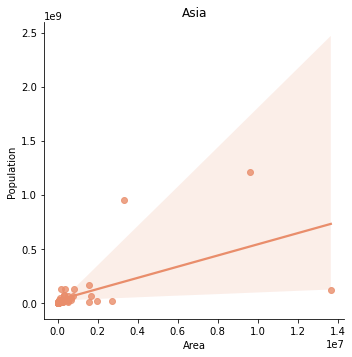


Europe:

               Country       Area  Population
               Austria   83850.00   8023244.0
               Albania   28750.00   3249136.0
               Andorra     450.00     72766.0
               Belgium   30510.00  10170241.0
              Bulgaria  110910.00   8612757.0
Bosnia and Herzegovina   51233.00   2656240.0
               Belarus  207600.00  10415973.0
           Switzerland   41290.00   7207060.0
                Cyprus    9251.00    744609.0
        Czech Republic   78703.00  10321120.0
               Germany  356910.00  83536115.0
               Denmark   43070.00   5249632.0
                 Spain  504750.00  39181114.0
               Estonia   45100.00   1459428.0
                France  547030.00  58317450.0
         Faroe Islands    1400.00     43857.0
         Liechtenstein     160.00     31122.0
        United Kingdom  244820.00  58489975.0
              Guernsey     194.00     62920.0
                Jersey     117.00     87848.0
                   Man  

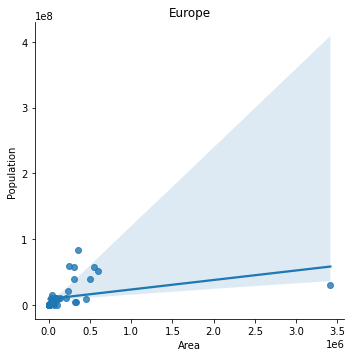

In [14]:
# This SQL query is not so complicated, but it could be helful to underline the relationship between those two parameters.
# For each continent, we select the area and population of countries.
# In the case of population, we estimate it as in Q1. 
sql1 = """SELECT cou.Name AS Country, cou.Area*enc.Percentage/100 AS Area, cou.Population*enc.Percentage/100 AS Population
            FROM country cou
            JOIN encompasses enc
            ON enc.Country = cou.Code
            WHERE enc.Continent = 'Asia'
        """

df1 = pd.read_sql(sql1, conn)
print('Asia:\n')
print(df1.to_string(index=False))

sns.set_palette('flare')
ax1=sns.lmplot(x='Area', y='Population', data=df1)
plt.title('Asia')
plt.show()

sql2 = """SELECT cou.Name AS Country, cou.Area*enc.Percentage/100 AS Area, cou.Population*enc.Percentage/100 AS Population
            FROM country cou
            JOIN encompasses enc
            ON enc.Country = cou.Code
            WHERE enc.Continent = 'Europe'
        """

df2 = pd.read_sql(sql2, conn)
print('\nEurope:\n')
print(df2.to_string(index=False))

sns.set_palette('tab10')
ax2=sns.lmplot(x='Area', y='Population', data=df2)
plt.title('Europe')
plt.show()

# As we expected, there is a linear relationship between area and population.
# The gradient of the vector is higher in the case of Asia, probably due to the countries with many citizens (China, Asia).



Q3: Highest mountains in Asia and Europe (JOIN with 3 tables, DISTINCT, CAST)

Asia:

      Mountain  Height
 Mount Everest    8848
            K2    8611
Kangchendzonga    8586
        Lhotse    8516
        Makalu    8485
       Cho Oyu    8188
    Dhaulagiri    8167
       Manaslu    8163
  Nanga Parbat    8125
     Annapurna    8091

Europe:

        Mountain  Height
      Mont Blanc    4808
      Monte Rosa    4634
      Matterhorn    4478
     GrandCombin    4314
  Finsteraarhorn    4274
Barre des Ecrins    4101
    GranParadiso    4061
     Piz Bernina    4048
   Grossglockner    3797
   Pico de Teide    3718


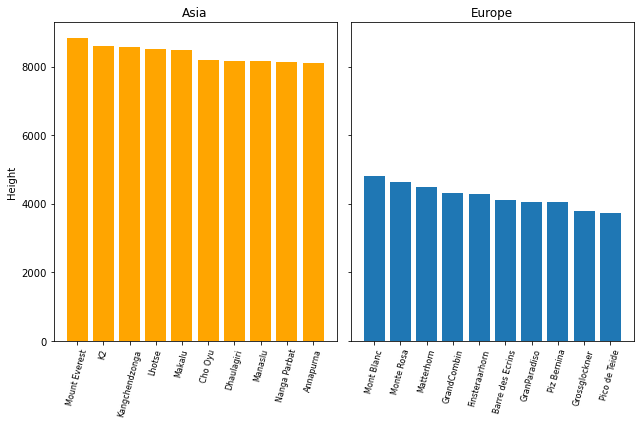

In [15]:
# For each continent, we join three tables to find the name and height of the mountains. 
# We limit our results to the first ten highest mountains in each continent.

# Asia
sql1 = """SELECT DISTINCT mou.Name as Mountain, CAST(mou.Height AS INT) AS Height
            FROM encompasses enc
            JOIN geo_mountain gem
            ON enc.Country = gem.Country
            JOIN mountain mou
            ON gem.Mountain = mou.Name
            WHERE (enc.Continent = 'Asia') 
            ORDER BY mou.Height DESC
            LIMIT 10
        """
df1 = pd.read_sql(sql1, conn)
print('Asia:\n')
print(df1.to_string(index=False))

# Europe
# We must exclude coutries like Russia and Turkey, which have high mountains in their Asian teritories)
sql2 = """SELECT DISTINCT mou.Name as Mountain, CAST(mou.Height AS INT) AS Height
            FROM encompasses enc
            JOIN geo_mountain gem
            ON enc.Country = gem.Country
            JOIN mountain mou
            ON gem.Mountain = mou.Name
            WHERE (enc.Continent = 'Europe') AND (enc.Percentage = 100)
            ORDER BY mou.Height DESC
            LIMIT 10
        """
df2 = pd.read_sql(sql2, conn)
print('\nEurope:\n')
print(df2.to_string(index=False))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,6))

plt.subplot(1, 2, 1).set_title('Asia')
ax1=plt.bar(df1['Mountain'], df1['Height'], color='orange')
plt.ylabel('Height')
plt.xticks(rotation = 75, fontsize=8)

plt.subplot(1, 2, 2).set_title('Europe')
ax2=plt.bar(df2['Mountain'], df2['Height'])
plt.xticks(rotation = 75, fontsize=8)

plt.tight_layout()
plt.show()

# As expected, the highest mountains are in Asia.
# The highest European mountains have only half the height of the Asian ones.


Q4: Number of islands belonging to Asian and European countries (JOIN with 3 tables, COUNT, DISTINCT, HAVING IN)

Continent        Country  Number_islands
   Europe United Kingdom              22
   Europe        Germany              15
     Asia      Indonesia              15
   Europe         Greece              11
   Europe       Portugal              11
   Europe          Italy              11
   Europe          Spain              11
     Asia    Philippines              10
   Europe        Denmark               6
     Asia          Japan               5
   Europe    Netherlands               5
     Asia         Russia               4
     Asia           Iran               3
   Europe          Malta               2
   Europe         Sweden               2


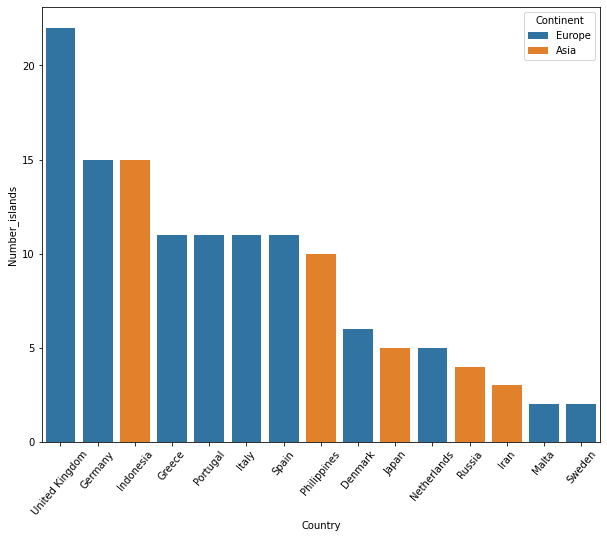

In [16]:
# We join three tables again, this time using "HAVING" to select only the two continents.
# We limit our results to the first 15 countries.
sql = """SELECT enc.Continent, cou.Name AS Country, COUNT(DISTINCT gei.Island) AS Number_islands
            FROM country cou
            JOIN encompasses enc
            ON cou.Code = enc.Country
            JOIN geo_island gei
            ON gei.Country = cou.Code
            GROUP BY gei.Country
            HAVING enc.Continent IN ('Europe', 'Asia') 
            ORDER BY Number_islands DESC
            LIMIT 15
        """
df = pd.read_sql(sql, conn)
print(df.to_string(index=False))

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df, x='Country', y='Number_islands', hue = 'Continent', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.show()

# We see again that the dataset is not so reliable.
# Norway, for example, has many islands, but they are not included in the tables.


Q5: Rivers with the most affluents in Asia and Europe (JOIN with 3 tables, recursive query, HAVING IN)

Continent     River_name  Number_afluents
   Europe          Donau               16
   Europe          Rhein                4
   Europe          Weser                3
     Asia             Ob                3
     Asia Schatt al Arab                3
   Europe             Po                3
   Europe           Aare                2
     Asia           Amur                2
   Europe          Rhone                2
   Europe           Drin                2


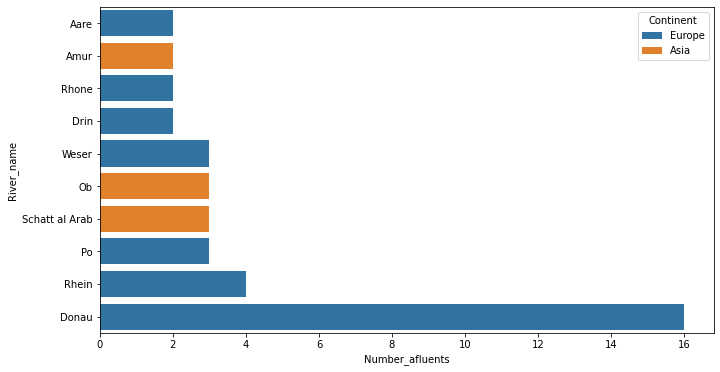

In [17]:
# This question has been chosen to exemplify a recursive query applied to the table "river".
# For each river, we select the number of its affluents; we limit the listing to the first ten rivers.
# For transcontinental countries, we consider the continent encompassing most of the territory of the country where the source of the river is located.

sql = """SELECT enc.Continent, r1.Name AS River_name, COUNT(r2.River) AS Number_afluents 
            FROM river r1
            JOIN river r2
            ON r1.Name = r2.River
            JOIN geo_source gesu
            ON r1.Name = gesu.River
            JOIN encompasses enc
            ON gesu.Country = enc.Country
            WHERE enc.Percentage > 50
            GROUP BY enc.Continent, r1.Name
            HAVING enc.Continent IN ('Europe', 'Asia')
            ORDER BY Number_afluents DESC
            LIMIT 10
        """

df = pd.read_sql(sql, conn)
print(df.to_string(index=False))

plt.figure(figsize=(11, 6))
ax = sns.barplot(data=df, 
                 x='Number_afluents', 
                 y='River_name', 
                 hue = 'Continent', 
                 orient='h', 
                 dodge=False, 
                 order=df.sort_values('Number_afluents', ascending=True).River_name
                )
plt.show()



Q6: Rivers passing through the most countries in Asia and Europe (nested query, UNION, MAX, COUNT+HAVING)

Continent    River  Number_countries
   Europe    Donau                10
   Europe    Rhein                 6
   Europe     Drau                 5
     Asia   Jordan                 5
     Asia   Mekong                 5
   Europe     Save                 4
     Asia Amudarja                 4
   Europe      Mur                 4
   Europe    Mosel                 3
     Asia  Irtysch                 3
   Europe     Maas                 3
     Asia   Tigris                 3
   Europe     Oder                 3
   Europe      Inn                 3
     Asia   Ganges                 3


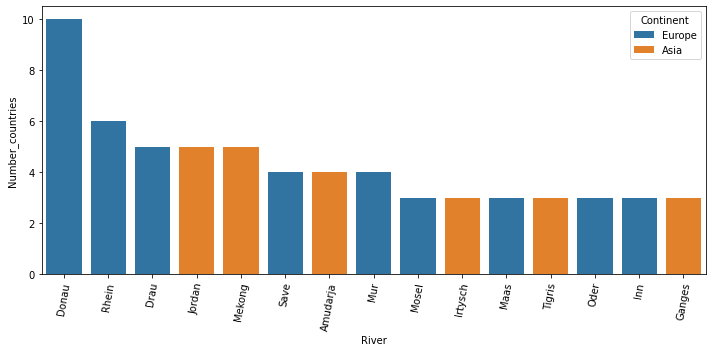

Continent River  Number_countries
   Europe Donau                10


In [18]:
# For this question, we use again "UNION" because the table "geo_river" does not contain the countries where the source and estuary are located.

sql = """SELECT enc.Continent, countries.River, COUNT(*) AS Number_countries 
            FROM
            (
            SELECT River, Country FROM geo_source gesu 
            UNION 
            SELECT River, Country FROM geo_river ger 
            UNION 
            SELECT River, Country FROM geo_estuary gee 
            ) countries
        JOIN encompasses enc
        ON countries.Country = enc.Country
        GROUP BY enc.Continent, countries.River
        HAVING enc.Continent IN ('Europe', 'Asia')
        ORDER BY Number_countries DESC
        LIMIT 15
    """

df = pd.read_sql(sql, conn)
print(df.to_string(index=False))

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='River', y='Number_countries', hue = 'Continent', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.tight_layout()
plt.show()

# If we want to see only the river passing through the most countries in the worls, we use COUNT+HAVING and MAX to select this river.
sql = """SELECT enc.Continent, countries.River, COUNT(*) AS Number_countries 
        FROM 
            (
            SELECT River, Country FROM geo_source gesu 
            UNION 
            SELECT River, Country FROM geo_river ger 
            UNION 
            SELECT River, Country FROM geo_estuary gee 
            ) countries
        JOIN encompasses enc
        ON countries.Country = enc.Country
        GROUP BY countries.River
        HAVING COUNT(*) = 
            (
            SELECT MAX(counts.Number_countries )
            FROM
               (
               SELECT River, COUNT(*) AS Number_countries 
               FROM
                   (
                    SELECT River, Country FROM geo_source gesu 
                    UNION 
                    SELECT River, Country FROM geo_river ger 
                    UNION 
                    SELECT River, Country FROM geo_estuary gee 
                    ) countries
               GROUP BY River
               ) counts
            )
        """
df = pd.read_sql(sql, conn)
print(df.to_string(index=False))



Q7: GDP per capita of Asia and Europe (JOIN with 3 tables, SUM, ROUND)

In [19]:
# For each continent, we sum up the GDP divided by population.
sql = """
        SELECT en.continent, ROUND(SUM(ec.GDP)/coun.population, 2) AS GDP_PER_CAPITA_ten_thousand_dollars
        FROM economy ec
        JOIN encompasses en
        ON ec.country = en.country
        JOIN country coun
        ON coun.code = ec.country
        WHERE en.continent = 'Asia' OR en.continent = 'Europe'
        GROUP BY en.continent 
    """

df = pd.read_sql(sql, conn)
print(df.to_string(index=False))

# From the result we see the GDP per capita of Europe is twice that of Asia.

continent  GDP_PER_CAPITA_ten_thousand_dollars
     Asia                                 0.60
   Europe                                 1.14



Q8: Relationship between industry and agriculture in Asian and European countries (nested query).

continent     country  industry  agriculture
   Europe     Austria      64.0          2.0
     Asia Afghanistan      20.0         65.0
     Asia     Armenia       7.0         57.0
   Europe     Belgium      70.0          2.0
   Europe    Bulgaria      52.0         12.0


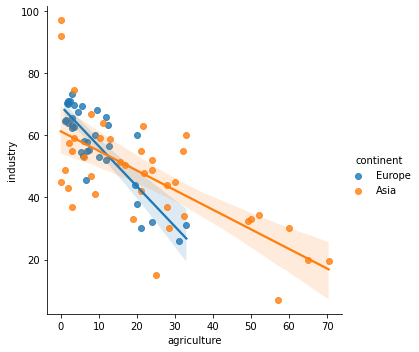

In [20]:
# This query allows us to study the relationship between the two parameters.
# We use a nested query instead of a JOIN with two tables to find the names of the countries.
sql = """
        SELECT en.continent,
            (SELECT coun.name FROM country coun WHERE coun.code = eco.country) AS country,
            eco.industry, 
            eco.agriculture
        FROM economy eco 
        JOIN encompasses en 
        ON en.country = eco.country
        WHERE (en.continent = 'Europe' OR en.continent = 'Asia')
            AND en.percentage > 50
            AND eco.industry IS NOT NULL
            AND eco.agriculture IS NOT NULL
    """

df = pd.read_sql(sql, conn)
print(df.head().to_string(index=False))

sns.lmplot(x='agriculture', y='industry', hue = "continent", data=df)
plt.show()

# As expected, the two parameters are inversely proportional.
# When industry is more developed, the importance of agriculture decreases, and vice versa.
# However, we see that the gradients of the two vectors are different.
# That means that industrialization in European countries is more developed.


Q9: Relationship between infant mortality and the GDP per capita of Asian and European countries (JOIN with 4 tables)

continent     country  infant_mortality  GDP_per_capita
     Asia Afghanistan             149.7        0.000565
     Asia      Bhutan             116.3        0.000713
     Asia  Tajikistan             113.1        0.001082
     Asia    Cambodia             107.8        0.000644
     Asia  Bangladesh             102.3        0.001174


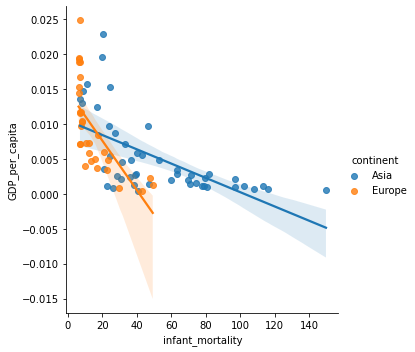

In [21]:
# This query allows us to study the relationship between the two parameters.
# To better vizualize the results, we limit them to the 80 countries where infant mortality is highest.
sql = """
        SELECT en.continent, coun.name as country, pop.infant_mortality, eco.GDP/coun.population as GDP_per_capita
        FROM population pop
        JOIN economy eco 
        ON eco.country = pop.country
        JOIN country coun 
        ON coun.code = pop.country
        JOIN encompasses en 
        ON en.country = pop.country
        WHERE pop.population_growth <> 'Null' 
            AND (en.continent = 'Europe' OR en.continent = 'Asia')
            AND en.percentage > 50
        ORDER BY pop.infant_mortality DESC 
        LIMIT 80 
    """

df = pd.read_sql(sql, conn)
print(df.head().to_string(index=False))

sns.lmplot(x='infant_mortality', y='GDP_per_capita',
           hue = "continent", data=df)
plt.show()

# As expected, the two parameters are inversely proportional.
# When infant mortality is higher, the GDP per capita is lesser, and vice versa.
# Once again, we see that the gradients of the two vectors are different.
# That means that European countries have reduced infant mortality more than Asian ones.



Q10: Religions appearing in only one European or Asian country (nested query, WHERE NOT EXISTS)

In [22]:
# Even if there are other (simpler) methods to solve this question, we use WHERE NOT EXISTS like in class.
sql = """
        SELECT rel.name as religion, 
                (SELECT country.name from country WHERE country.code = rel.country) as country, 
                en.continent 
        FROM religion rel
        JOIN encompasses en 
        ON en.country = rel.country
        WHERE NOT EXISTS
            (
            SELECT * FROM religion 
            WHERE rel.country <> religion.country AND rel.name = religion.name
            ) 
        AND (en.continent = 'Europe' OR en.continent = 'Asia')
        ORDER BY continent
    """

df = pd.read_sql(sql, conn)
print(df.to_string(index=False))

# Once again, we see that the dataset is not reliable in this aspect.
# We expect, for example, that "Armenian Apostolic" is also met in Armenia and "Taoist" in China".
# However, for some reason, it is not the case.

          religion     country continent
             Druze      Israel      Asia
      Confucianism South Korea      Asia
            Taoist      Taiwan      Asia
Armenian Apostolic     Georgia      Asia
             Jains       India      Asia
  Coptic Christian       Egypt      Asia
         Chondogyo South Korea      Asia
              Sikh       India      Asia
           Judaism      Israel      Asia
       Pentecostal      Sweden    Europe
